<a href="https://colab.research.google.com/github/HariTarz/Transport_Demand_Prediction/blob/main/Demand_Prediction_for_Public_Transport_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Traffic Jam: Predicting People's Movement into Nairobi </u></b>

## <b> Problem Description </b>

### This challenge asks you to build a model that predicts the number of seats that Mobiticket can expect to sell for each ride, i.e. for a specific route on a specific date and time. There are 14 routes in this dataset. All of the routes end in Nairobi and originate in towns to the North-West of Nairobi towards Lake Victoria.


### The towns from which these routes originate are:

* Awendo
* Homa Bay
* Kehancha
* Kendu Bay
* Keroka
* Keumbu
* Kijauri
* Kisii
* Mbita
* Migori
* Ndhiwa
* Nyachenge
* Oyugis
* Rodi
* Rongo
* Sirare
* Sori

### The routes from these 14 origins to the first stop in the outskirts of Nairobi takes approximately 8 to 9 hours from time of departure. From the first stop in the outskirts of Nairobi into the main bus terminal, where most passengers get off, in Central Business District, takes another 2 to 3 hours depending on traffic.

### The three stops that all these routes make in Nairobi (in order) are:

1. Kawangware: the first stop in the outskirts of Nairobi
2. Westlands
3. Afya Centre: the main bus terminal where most passengers disembark

### All of these points are mapped [here](https://www.google.com/maps/d/viewer?mid=1Ef2pFdP8keVHHid8bwju2raoRvjOGagN&ll=-0.8281897101491997%2C35.51706279999996&z=8).

### Passengers of these bus (or shuttle) rides are affected by Nairobi traffic not only during their ride into the city, but from there they must continue their journey to their final destination in Nairobi wherever that may be. Traffic can act as a deterrent for those who have the option to avoid buses that arrive in Nairobi during peak traffic hours. On the other hand, traffic may be an indication for people’s movement patterns, reflecting business hours, cultural events, political events, and holidays.

## <b> Data Description </b>

### <b>Nairobi Transport Data.csv (zipped)</b> is the dataset of tickets purchased from Mobiticket for the 14 routes from “up country” into Nairobi between 17 October 2017 and 20 April 2018. This dataset includes the variables: ride_id, seat_number, payment_method, payment_receipt, travel_date, travel_time, travel_from, travel_to, car_type, max_capacity.


### Uber Movement traffic data can be accessed [here](https://movement.uber.com). Data is available for Nairobi through June 2018. Uber Movement provided historic hourly travel time between any two points in Nairobi. Any tables that are extracted from the Uber Movement platform can be used in your model.

### Variables description:

* #### ride_id: unique ID of a vehicle on a specific route on a specific day and time.
* #### seat_number: seat assigned to ticket
* #### payment_method: method used by customer to purchase ticket from Mobiticket (cash or Mpesa)
* #### payment_receipt: unique id number for ticket purchased from Mobiticket
* #### travel_date: date of ride departure. (MM/DD/YYYY)
* #### travel_time: scheduled departure time of ride. Rides generally depart on time. (hh:mm)
* #### travel_from: town from which ride originated
* #### travel_to: destination of ride. All rides are to Nairobi.
* #### car_type: vehicle type (shuttle or bus)
* #### max_capacity: number of seats on the vehicle

## Importing required libraries

In [234]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
%matplotlib inline

## Mounting the drive and reading the dataset file

In [235]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [236]:
path = '/content/drive/MyDrive/Colab Notebooks/AlmaBetter/Supervised ML - Regression Capstone Project/Transport Demand Prediction/dat/train_revised.csv'
df = pd.read_csv(path)

## Exploring the dataset

In [237]:
# Viewing the data for the first time
df.head()

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity
0,1442,15A,Mpesa,UZUEHCBUSO,17-10-17,7:15,Migori,Nairobi,Bus,49
1,5437,14A,Mpesa,TIHLBUSGTE,19-11-17,7:12,Migori,Nairobi,Bus,49
2,5710,8B,Mpesa,EQX8Q5G19O,26-11-17,7:05,Keroka,Nairobi,Bus,49
3,5777,19A,Mpesa,SGP18CL0ME,27-11-17,7:10,Homa Bay,Nairobi,Bus,49
4,5778,11A,Mpesa,BM97HFRGL9,27-11-17,7:12,Migori,Nairobi,Bus,49


In [238]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51645 entries, 0 to 51644
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ride_id          51645 non-null  int64 
 1   seat_number      51645 non-null  object
 2   payment_method   51645 non-null  object
 3   payment_receipt  51645 non-null  object
 4   travel_date      51645 non-null  object
 5   travel_time      51645 non-null  object
 6   travel_from      51645 non-null  object
 7   travel_to        51645 non-null  object
 8   car_type         51645 non-null  object
 9   max_capacity     51645 non-null  int64 
dtypes: int64(2), object(8)
memory usage: 3.9+ MB


In [239]:
df.shape

(51645, 10)

In [240]:
# Viewing the type 'object' columns description 
df.describe(include = 'object')

,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type
count,51645,51645,51645,51645,51645,51645,51645,51645
unique,61,2,51645,149,78,17,1,2
top,1,Mpesa,UZUEHCBUSO,10-12-17,7:09,Kisii,Nairobi,Bus
freq,2065,51532,1,856,3926,22607,51645,31985


In [241]:
# Checking for null value containing row counts
df.isnull().sum()

ride_id            0
seat_number        0
payment_method     0
payment_receipt    0
travel_date        0
travel_time        0
travel_from        0
travel_to          0
car_type           0
max_capacity       0
dtype: int64

<b>Finding the target variable</b>

Since we are not given the target variable so we need to find target variable first.

The idea to find the target variable 'Number  of Tickets' allocated is for each ticket of an individual bus on individual day will be created with the sae 'ride_id'

In [242]:
# Calculation of Target varible based on the ride id
tmp_no_tickect_df = df.groupby(['ride_id']).seat_number.count().rename('number_of_ticket').reset_index()
tmp_no_tickect_df.head()

,ride_id,number_of_ticket
0,1442,1
1,5437,1
2,5710,1
3,5777,5
4,5778,31


In [243]:
# droping the duplicate value rows with the repeating ride_id
df.drop_duplicates('ride_id', inplace = True)

# Dropping the columns which are not relevant to our target variable
df.drop(['seat_number','payment_method','payment_receipt', 'travel_to'], inplace= True, axis = 1)
df.shape

(6249, 6)

In [244]:
# Merging the calculated target variable column to the dataset based on the ride_id
df = df.merge(tmp_no_tickect_df, how= 'left', on='ride_id')

In [245]:
# Combaining the date column and time column to get the complete timestamp
df['travel_date_and_time'] = df['travel_date'] + " " + df['travel_time']
df['travel_date_and_time'] = pd.to_datetime(df['travel_date_and_time'])
df.drop(['travel_date', 'travel_time'], inplace= True, axis= 1)

In [246]:
df.head()

,ride_id,travel_from,car_type,max_capacity,number_of_ticket,travel_date_and_time
0,1442,Migori,Bus,49,1,2017-10-17 07:15:00
1,5437,Migori,Bus,49,1,2017-11-19 07:12:00
2,5710,Keroka,Bus,49,1,2017-11-26 07:05:00
3,5777,Homa Bay,Bus,49,5,2017-11-27 07:10:00
4,5778,Migori,Bus,49,31,2017-11-27 07:12:00


## EDA

Text(0.5, 1.0, 'Disbribution of number_of_ticket')

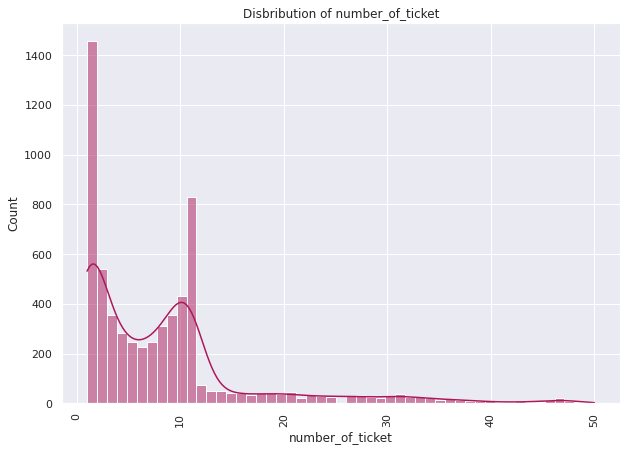

In [247]:
# Plotting the target variable 'number_of_ticket'
fig = plt.figure(figsize=(10,7))
ax = fig.gca()
sns.histplot(x='number_of_ticket', data=df, color='#ad1759', kde=True)
sns.set_theme(style='darkgrid')
plt.xticks(rotation=90)
# ax.set_xlabel('travel_from')
# ax.set_ylabel('Frequency')
ax.set_title('Disbribution of number_of_ticket')

Text(0.5, 1.0, 'travel_from counts')

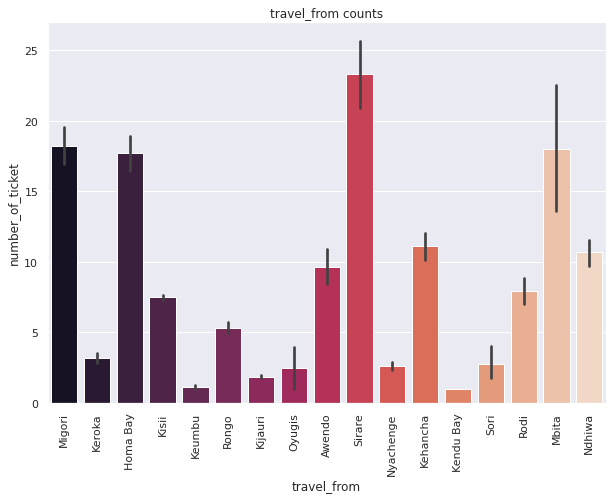

In [248]:
fig = plt.figure(figsize=(10,7))
ax = fig.gca()
sns.barplot(x="travel_from", y="number_of_ticket", data=df, palette= 'rocket')
sns.set_theme(style='darkgrid')
plt.xticks(rotation=90)
# ax.set_xlabel('travel_from')
# ax.set_ylabel('Frequency')
ax.set_title('travel_from counts')

Text(0.5, 1.0, 'travel_from counts')

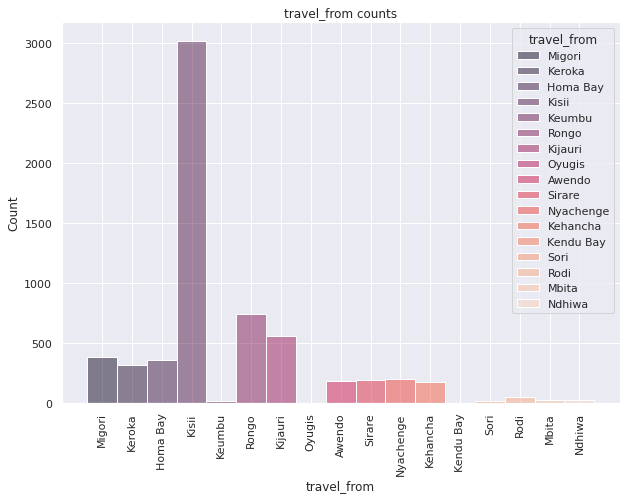

In [249]:
fig = plt.figure(figsize=(10,7))
ax = fig.gca()
sns.histplot(x='travel_from', data=df, hue='travel_from', palette='rocket')
sns.set_theme(style='darkgrid')
plt.xticks(rotation=90)
# ax.set_xlabel('travel_from')
# ax.set_ylabel('Frequency')
ax.set_title('travel_from counts')

Text(0.5, 1.0, 'car_type counts')

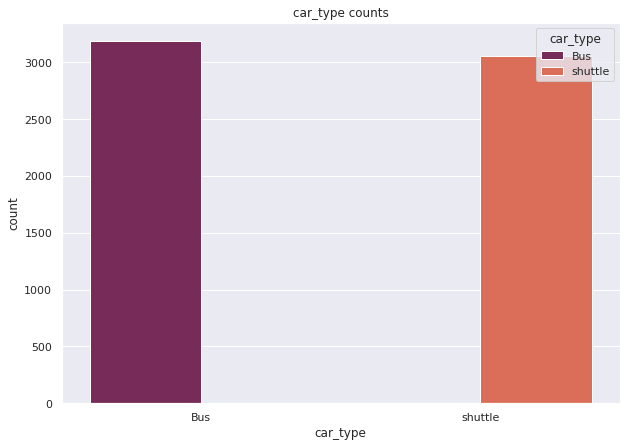

In [250]:
fig = plt.figure(figsize=(10,7))
ax = fig.gca()
sns.countplot(x='car_type', data=df, hue='car_type', palette='rocket')
sns.set_theme(style='darkgrid')
ax.set_xlabel('car_type')
# ax.set_ylabel('Frequency')
ax.set_title('car_type counts')

Text(0.5, 1.0, 'max_capacity counts')

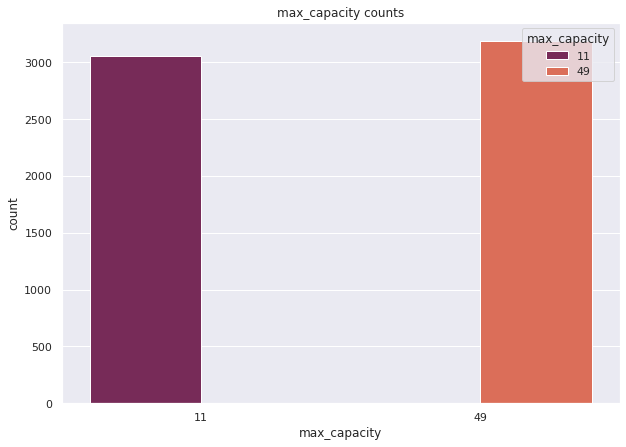

In [251]:
fig = plt.figure(figsize=(10,7))
ax = fig.gca()
sns.countplot(x='max_capacity', data=df, hue='max_capacity', palette='rocket')
sns.set_theme(style='darkgrid')
ax.set_xlabel('max_capacity')
# ax.set_ylabel('Frequency')
ax.set_title('max_capacity counts')

## Feature Engineering

In [252]:
# Coping the dataset to a new variable
trans_df = df.copy()

In [253]:
# Extracting the date and time column to get time based informations
 
trans_df['travel_year']= trans_df['travel_date_and_time'].dt.year
trans_df['travel_month']= trans_df['travel_date_and_time'].dt.month
trans_df['travel_year_quarter']= trans_df['travel_date_and_time'].dt.quarter
trans_df['travel_day_of_year']= trans_df['travel_date_and_time'].dt.dayofyear
trans_df['travel_day_of_month']= trans_df['travel_date_and_time'].dt.day
trans_df['travel_day_of_week']= trans_df['travel_date_and_time'].dt.dayofweek
trans_df['travel_is_in_weekend']= trans_df['travel_day_of_week'].apply(lambda d: 1 if d in [5,6] else 0)
trans_df['travel_hour']= trans_df['travel_date_and_time'].dt.hour
# trans_df['travel_minute']= trans_df['travel_date_and_time'].dt.minute

Text(0.5, 1.0, 'month based travel counts')

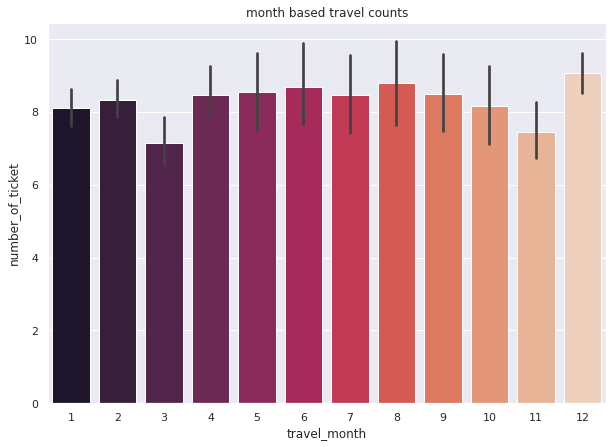

In [254]:
fig = plt.figure(figsize=(10,7))
ax = fig.gca()
sns.barplot(x="travel_month", y="number_of_ticket", data=trans_df, palette='rocket')
sns.set_theme(style='darkgrid')
ax.set_title('month based travel counts')

From the above plot ticket booking are happening in all the 12 months of a year.

Text(0.5, 1.0, 'dates of a month based travel counts')

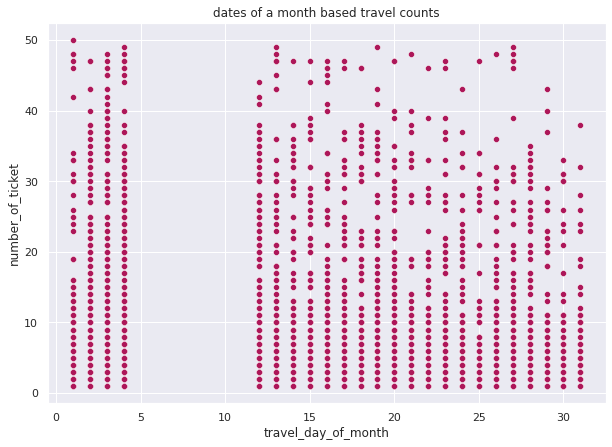

In [255]:
fig = plt.figure(figsize=(10,7))
ax = fig.gca()
sns.scatterplot(x="travel_day_of_month", y="number_of_ticket", data=trans_df, color='#ad1759')
sns.set_theme(style='darkgrid')
ax.set_title('dates of a month based travel counts')

We can see that there is the gap between 5 to 11 in the day of the month. We can assume that there is official holyday of public transport between these days. we can also say that the number of tickets in all the days of month are same.

No handles with labels found to put in legend.


Text(0.5, 1.0, 'days of a week based travel counts')

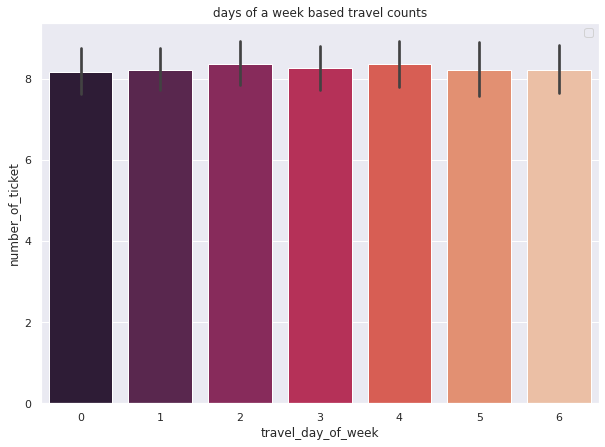

In [256]:
# days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
fig = plt.figure(figsize=(10,7))
ax = fig.gca()
sns.barplot(x="travel_day_of_week", y="number_of_ticket", data=trans_df, palette= 'rocket')
plt.legend( loc='upper right')
sns.set_theme(style='darkgrid')
ax.set_title('days of a week based travel counts')

From the above plot ticket booking are happening in all the 7 days of a week.

Text(0.5, 1.0, 'hour of a day based travel counts')

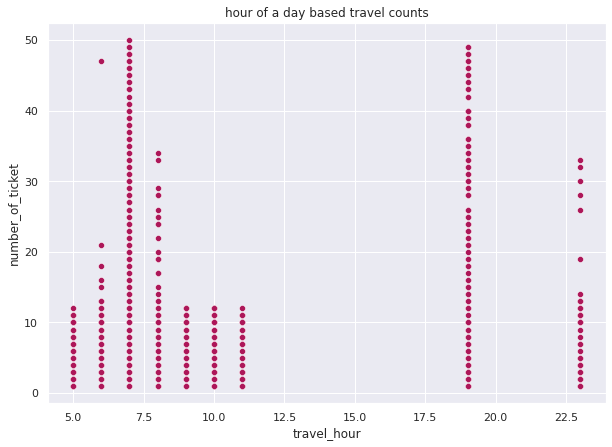

In [257]:
fig = plt.figure(figsize=(10,7))
ax = fig.gca()
sns.scatterplot(x="travel_hour", y="number_of_ticket", data=trans_df, color='#ad1759')
sns.set_theme(style='darkgrid')
ax.set_title('hour of a day based travel counts')

We can see that most of the ticktes were sold at 7 AM and 8 PM. And that seems true because in the morning most of the people go to the work and office.

From the above we can say that there is not ride between 12 PM to 5.30 PM

In [258]:
def time_to_period(h):
  '''This function can take hours as input and return the time period of a day as output'''
  if h >= 7 and h < 11:
    return 'morning'
  elif h >= 11 and h < 15:
    return 'after_noon'
  elif h >= 15 and h < 19:
    return 'evening'
  elif h >= 19 and h <= 24:
    return 'night'
  else:
    return 'early_morning'

In [259]:
# Calculation of time period based on the travel_date_and_time feature
trans_df['travel_time_period'] = trans_df.travel_hour.apply(time_to_period)

In [260]:
# Creating a seperate column for giving hour wise weights for the hours column
travel_time_period_counts = dict(trans_df.travel_time_period.value_counts())
trans_df['travel_hour_wise_weights'] = np.log1p(trans_df.travel_time_period.map(travel_time_period_counts))

In [261]:
# Creating a seperate column for giving day of a year wise weights for the hours column
travel_day_of_year_counts = dict(trans_df.travel_day_of_year.value_counts())
trans_df['travel_day_of_year_wise_weights'] = np.log1p(trans_df.travel_day_of_year.map(travel_day_of_year_counts))

In [262]:
# Counts of tickets in booked in each dates of a month
trans_df.travel_day_of_month.value_counts()

2     706
12    685
3     659
4     446
1     267
13    249
14    247
16    238
28    228
19    226
18    226
15    213
17    209
20    202
22    192
21    183
27    179
29    177
23    159
24    137
26    120
30    113
25     96
31     92
Name: travel_day_of_month, dtype: int64

In [263]:
# Giving weights to the each days of the month based on the frequency of ticket bookings
travel_day_of_month_wise_weights_dict = {2:1, 12:1, 3:1, 4:2, 1:3, 13:3, 14:3, 16:3, 28:3, 19:3, 18:3, 15:3, 17:3, 20:3, 22:4, 21:4, 27:4, 29:4, 23:4, 24:4, 26:4, 30:4, 25:4, 31:4}
trans_df['travel_day_of_month_wise_weights'] = trans_df.travel_day_of_month.replace(travel_day_of_month_wise_weights_dict)

In [264]:
# Counts of tickets in booked in each months of year
trans_df.travel_month.value_counts()

12    1050
2      985
1      896
3      853
4      600
11     414
9      262
7      254
8      251
10     247
6      225
5      212
Name: travel_month, dtype: int64

In [265]:
# Creating a column for giving weights to the each months of a year based on the frequency of ticket bookings
travel_month_wise_weights_dict = {12: 1,
 2: 1,
 1: 1,
 3: 1,
 4: 1,
 11: 2,
 9: 3,
 7: 3,
 8: 3,
 10: 3,
 6: 3,
 5: 3}
trans_df['travel_month_wise_weights'] = trans_df.travel_month.replace(travel_month_wise_weights_dict)

In [266]:
trans_df.head()

,ride_id,travel_from,car_type,max_capacity,number_of_ticket,travel_date_and_time,travel_year,travel_month,travel_year_quarter,travel_day_of_year,travel_day_of_month,travel_day_of_week,travel_is_in_weekend,travel_hour,travel_time_period,travel_hour_wise_weights,travel_day_of_year_wise_weights,travel_day_of_month_wise_weights,travel_month_wise_weights
0,1442,Migori,Bus,49,1,2017-10-17 07:15:00,2017,10,4,290,17,1,0,7,morning,8.494743,0.693147,3,3
1,5437,Migori,Bus,49,1,2017-11-19 07:12:00,2017,11,4,323,19,6,1,7,morning,8.494743,0.693147,3,2
2,5710,Keroka,Bus,49,1,2017-11-26 07:05:00,2017,11,4,330,26,6,1,7,morning,8.494743,0.693147,4,2
3,5777,Homa Bay,Bus,49,5,2017-11-27 07:10:00,2017,11,4,331,27,0,0,7,morning,8.494743,3.871201,4,2
4,5778,Migori,Bus,49,31,2017-11-27 07:12:00,2017,11,4,331,27,0,0,7,morning,8.494743,3.871201,4,2


In [267]:
# tmp_df = trans_df.copy()

In [268]:
def calculate_next_and_previous_timings(tmp_df):
  tmp_df.sort_values(['travel_from', 'travel_date_and_time'], inplace= True)
  tmp_df['delay_btw_initial_to_next_and_previous_bus'] = (tmp_df.groupby(['travel_from']).travel_date_and_time.shift(-1) - tmp_df.groupby(['travel_from']).travel_date_and_time.shift(1)).dt.total_seconds()/3600
  tmp_df['delay_btw_1bus_and_next_bus'] = (tmp_df.travel_date_and_time - tmp_df.groupby(['travel_from']).travel_date_and_time.shift(-1)).dt.total_seconds()/3600
  tmp_df['delay_btw_1bus_and_previous_bus'] = (tmp_df.travel_date_and_time - tmp_df.groupby(['travel_from']).travel_date_and_time.shift(1)).dt.total_seconds()/3600
  tmp_df['delay_btw_2bus_and_next_bus'] = (tmp_df.travel_date_and_time - tmp_df.groupby(['travel_from']).travel_date_and_time.shift(-2)).dt.total_seconds()/3600
  tmp_df['delay_btw_2bus_and_previous_bus'] = (tmp_df.travel_date_and_time - tmp_df.groupby(['travel_from']).travel_date_and_time.shift(2)).dt.total_seconds()/3600
  tmp_df['delay_btw_3bus_and_next_bus'] = (tmp_df.travel_date_and_time - tmp_df.groupby(['travel_from']).travel_date_and_time.shift(-3)).dt.total_seconds()/3600
  tmp_df['delay_btw_3bus_and_previous_bus'] = (tmp_df.travel_date_and_time - tmp_df.groupby(['travel_from']).travel_date_and_time.shift(3)).dt.total_seconds()/3600
  new_col = ['delay_btw_initial_to_next_and_previous_bus', 'delay_btw_1bus_and_next_bus', 'delay_btw_1bus_and_previous_bus', 'delay_btw_2bus_and_next_bus', 'delay_btw_2bus_and_previous_bus', 'delay_btw_3bus_and_next_bus','delay_btw_3bus_and_previous_bus']
  tmp_df[new_col] = tmp_df.groupby(['travel_from'])[new_col].fillna(method = 'ffill')
  tmp_df[new_col] = tmp_df.groupby(['travel_from'])[new_col].fillna(method = 'backfill')
  
  return tmp_df

In [269]:
trans_df = calculate_next_and_previous_timings(trans_df)

In [270]:
trans_df.isnull().sum()

ride_id                                       0
travel_from                                   0
car_type                                      0
max_capacity                                  0
number_of_ticket                              0
travel_date_and_time                          0
travel_year                                   0
travel_month                                  0
travel_year_quarter                           0
travel_day_of_year                            0
travel_day_of_month                           0
travel_day_of_week                            0
travel_is_in_weekend                          0
travel_hour                                   0
travel_time_period                            0
travel_hour_wise_weights                      0
travel_day_of_year_wise_weights               0
travel_day_of_month_wise_weights              0
travel_month_wise_weights                     0
delay_btw_initial_to_next_and_previous_bus    3
delay_btw_1bus_and_next_bus             

In [271]:
trans_df.dropna(inplace= True)
trans_df.shape

(6246, 26)

In [272]:
trans_df.head()

,ride_id,travel_from,car_type,max_capacity,number_of_ticket,travel_date_and_time,travel_year,travel_month,travel_year_quarter,travel_day_of_year,...,travel_day_of_year_wise_weights,travel_day_of_month_wise_weights,travel_month_wise_weights,delay_btw_initial_to_next_and_previous_bus,delay_btw_1bus_and_next_bus,delay_btw_1bus_and_previous_bus,delay_btw_2bus_and_next_bus,delay_btw_2bus_and_previous_bus,delay_btw_3bus_and_next_bus,delay_btw_3bus_and_previous_bus
502,6654,Awendo,Bus,49,2,2017-05-12 07:08:00,2017,5,2,132,...,4.025352,1,3,5688.066667,-5688.000000,5688.000000,-5688.066667,5688.066667,-5688.083333,5688.083333
5530,12926,Awendo,Bus,49,20,2018-01-04 07:08:00,2018,1,1,4,...,3.526361,2,1,5688.066667,-0.066667,5688.000000,-0.083333,5688.066667,-0.866667,5688.083333
5533,12929,Awendo,Bus,49,2,2018-01-04 07:12:00,2018,1,1,4,...,3.526361,2,1,0.083333,-0.016667,0.066667,-0.800000,5688.066667,-215.933333,5688.083333
5539,12935,Awendo,Bus,49,9,2018-01-04 07:13:00,2018,1,1,4,...,3.526361,2,1,0.800000,-0.783333,0.016667,-215.916667,0.083333,-216.033333,5688.083333
5528,12924,Awendo,Bus,49,15,2018-01-04 08:00:00,2018,1,1,4,...,3.526361,2,1,215.916667,-215.133333,0.783333,-215.250000,0.800000,-239.133333,0.866667


In [273]:
travel_distance_to_Nairobi_dict = {'Awendo':352, 'Homa Bay':368, 'Kehancha':308, 'Kendu Bay':343, 'Keroka':281, 'Keumbu':295,
                                   'Kijauri':272, 'Kisii':306, 'Mbita':406, 'Migori':373, 'Ndhiwa':385, 'Nyachenge':313, 'Oyugis':324, 
                                   'Rodi':348, 'Rongo':333, 'Sirare':415, 'Sori':407}
trans_df['travel_distance_to_Nairobi'] = trans_df.travel_from.map(travel_distance_to_Nairobi_dict)

Text(0.5, 1.0, 'Distribution of travel distance to Nairobi')

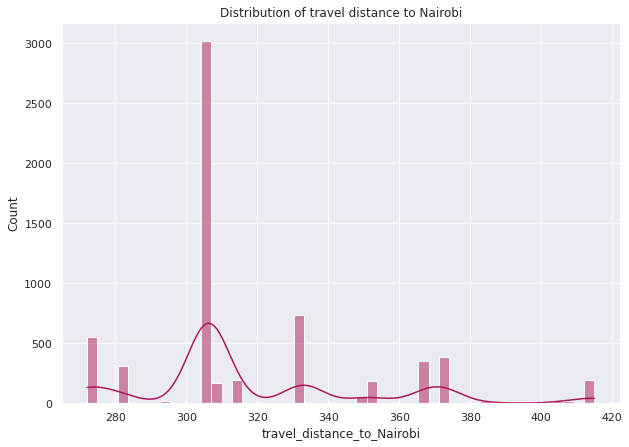

In [274]:
fig = plt.figure(figsize=(10,7))
ax = fig.gca()
sns.histplot(x="travel_distance_to_Nairobi", data=trans_df, color='#ad1759', kde=True)
sns.set_theme(style='darkgrid')
ax.set_title('Distribution of travel distance to Nairobi')

In [275]:
travel_time_to_Nairobi_dict = {'Awendo': 6*60+24, 'Homa Bay': 6*60+29, 'Kehancha': 6*60+11, 'Kendu Bay': 6*60, 'Keroka': 4*60+55, 'Keumbu': 5*60+13, 'Kijauri': 4*60+44, 
 'Kisii': 5*60+29, 'Mbita': 7*60+8, 'Migori': 6*60+54, 'Ndhiwa': 6*60+47, 'Nyachenge': 5*60+40, 'Oyugis': 5*60+42, 'Rodi': 6*60+40, 'Rongo': 6*60+5, 'Sirare': 8*60+4, 'Sori': 7*60+11}
trans_df['travel_time_to_Nairobi'] = trans_df.travel_from.map(travel_time_to_Nairobi_dict)

Text(0.5, 1.0, 'Distribution of travel time to Nairobi')

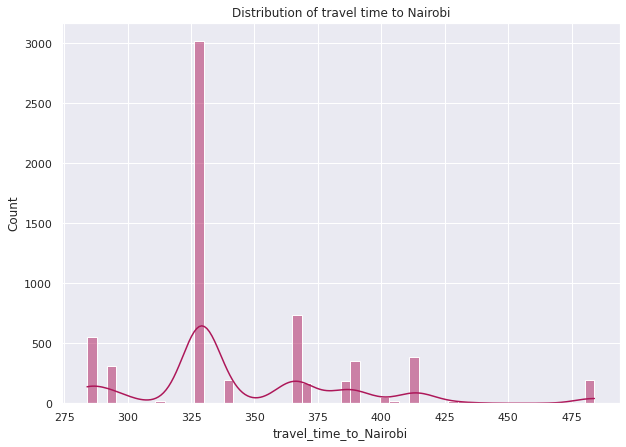

In [276]:
fig = plt.figure(figsize=(10,7))
ax = fig.gca()
sns.histplot(x="travel_time_to_Nairobi", data=trans_df, color='#ad1759', kde=True)
sns.set_theme(style='darkgrid')
ax.set_title('Distribution of travel time to Nairobi')

In [277]:
trans_df['travel_speed_to_Nairobi'] = trans_df.travel_distance_to_Nairobi / trans_df.travel_time_to_Nairobi

Text(0.5, 1.0, 'Distribution of travel speed to Nairobi')

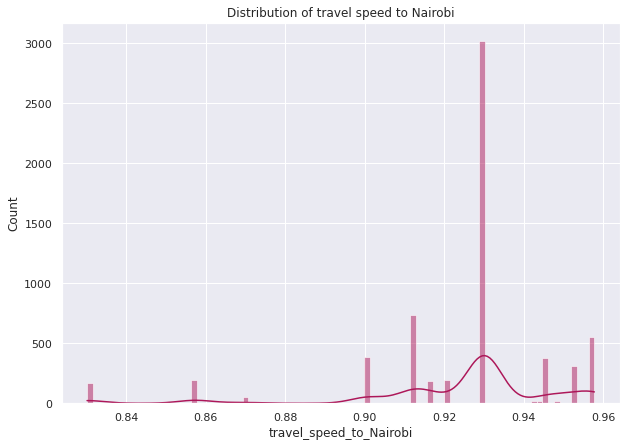

In [278]:
fig = plt.figure(figsize=(10,7))
ax = fig.gca()
sns.histplot(x="travel_speed_to_Nairobi", data=trans_df, color='#ad1759', kde=True)
sns.set_theme(style='darkgrid')
ax.set_title('Distribution of travel speed to Nairobi')

In [279]:
from datetime import timedelta

for key in travel_time_to_Nairobi_dict.keys(): 
    travel_time_to_Nairobi_dict[key]=timedelta( minutes=travel_time_to_Nairobi_dict[key])
travel_time_to_Nairobi_dict

{'Awendo': datetime.timedelta(seconds=23040),
 'Homa Bay': datetime.timedelta(seconds=23340),
 'Kehancha': datetime.timedelta(seconds=22260),
 'Kendu Bay': datetime.timedelta(seconds=21600),
 'Keroka': datetime.timedelta(seconds=17700),
 'Keumbu': datetime.timedelta(seconds=18780),
 'Kijauri': datetime.timedelta(seconds=17040),
 'Kisii': datetime.timedelta(seconds=19740),
 'Mbita': datetime.timedelta(seconds=25680),
 'Migori': datetime.timedelta(seconds=24840),
 'Ndhiwa': datetime.timedelta(seconds=24420),
 'Nyachenge': datetime.timedelta(seconds=20400),
 'Oyugis': datetime.timedelta(seconds=20520),
 'Rodi': datetime.timedelta(seconds=24000),
 'Rongo': datetime.timedelta(seconds=21900),
 'Sirare': datetime.timedelta(seconds=29040),
 'Sori': datetime.timedelta(seconds=25860)}

In [280]:
trans_df['travel_arrival_data_and_time'] = trans_df.travel_from.map(travel_time_to_Nairobi_dict)
trans_df['travel_arrival_data_and_time'] = trans_df.travel_date_and_time + trans_df['travel_arrival_data_and_time']
trans_df['travel_arrival_hour'] = trans_df.travel_arrival_data_and_time.dt.hour
trans_df['travel_arrival_minute'] = trans_df.travel_arrival_data_and_time.dt.minute
trans_df["travel_is_in_rush_hour"]= trans_df.travel_arrival_hour.apply(lambda h: 1 if (h>=7) and (h<= 17) else 0)

## Handling Categorical Features

In [281]:
trans_df.columns

Index(['ride_id', 'travel_from', 'car_type', 'max_capacity',
       'number_of_ticket', 'travel_date_and_time', 'travel_year',
       'travel_month', 'travel_year_quarter', 'travel_day_of_year',
       'travel_day_of_month', 'travel_day_of_week', 'travel_is_in_weekend',
       'travel_hour', 'travel_time_period', 'travel_hour_wise_weights',
       'travel_day_of_year_wise_weights', 'travel_day_of_month_wise_weights',
       'travel_month_wise_weights',
       'delay_btw_initial_to_next_and_previous_bus',
       'delay_btw_1bus_and_next_bus', 'delay_btw_1bus_and_previous_bus',
       'delay_btw_2bus_and_next_bus', 'delay_btw_2bus_and_previous_bus',
       'delay_btw_3bus_and_next_bus', 'delay_btw_3bus_and_previous_bus',
       'travel_distance_to_Nairobi', 'travel_time_to_Nairobi',
       'travel_speed_to_Nairobi', 'travel_arrival_data_and_time',
       'travel_arrival_hour', 'travel_arrival_minute',
       'travel_is_in_rush_hour'],
      dtype='object')

In [282]:
cat_features = ['travel_from','travel_day_of_month_wise_weights','travel_month_wise_weights']
trans_df = pd.get_dummies(trans_df, columns=cat_features)
label_enc = {'Bus':1, 'shuttle':0}
trans_df.car_type.replace(label_enc, inplace= True)

In [283]:
trans_df.head()

,ride_id,car_type,max_capacity,number_of_ticket,travel_date_and_time,travel_year,travel_month,travel_year_quarter,travel_day_of_year,travel_day_of_month,...,travel_from_Rongo,travel_from_Sirare,travel_from_Sori,travel_day_of_month_wise_weights_1,travel_day_of_month_wise_weights_2,travel_day_of_month_wise_weights_3,travel_day_of_month_wise_weights_4,travel_month_wise_weights_1,travel_month_wise_weights_2,travel_month_wise_weights_3
502,6654,1,49,2,2017-05-12 07:08:00,2017,5,2,132,12,...,0,0,0,1,0,0,0,0,0,1
5530,12926,1,49,20,2018-01-04 07:08:00,2018,1,1,4,4,...,0,0,0,0,1,0,0,1,0,0
5533,12929,1,49,2,2018-01-04 07:12:00,2018,1,1,4,4,...,0,0,0,0,1,0,0,1,0,0
5539,12935,1,49,9,2018-01-04 07:13:00,2018,1,1,4,4,...,0,0,0,0,1,0,0,1,0,0
5528,12924,1,49,15,2018-01-04 08:00:00,2018,1,1,4,4,...,0,0,0,0,1,0,0,1,0,0


In [284]:
trans_df.columns

Index(['ride_id', 'car_type', 'max_capacity', 'number_of_ticket',
       'travel_date_and_time', 'travel_year', 'travel_month',
       'travel_year_quarter', 'travel_day_of_year', 'travel_day_of_month',
       'travel_day_of_week', 'travel_is_in_weekend', 'travel_hour',
       'travel_time_period', 'travel_hour_wise_weights',
       'travel_day_of_year_wise_weights',
       'delay_btw_initial_to_next_and_previous_bus',
       'delay_btw_1bus_and_next_bus', 'delay_btw_1bus_and_previous_bus',
       'delay_btw_2bus_and_next_bus', 'delay_btw_2bus_and_previous_bus',
       'delay_btw_3bus_and_next_bus', 'delay_btw_3bus_and_previous_bus',
       'travel_distance_to_Nairobi', 'travel_time_to_Nairobi',
       'travel_speed_to_Nairobi', 'travel_arrival_data_and_time',
       'travel_arrival_hour', 'travel_arrival_minute',
       'travel_is_in_rush_hour', 'travel_from_Awendo', 'travel_from_Homa Bay',
       'travel_from_Kehancha', 'travel_from_Keroka', 'travel_from_Keumbu',
       'travel_from_

In [285]:
req_columns = ['car_type', 'max_capacity','travel_year',
       'travel_is_in_weekend', 'travel_hour',
       'travel_day_of_year_wise_weights',
       'travel_day_of_month_wise_weights_1', 'travel_day_of_month_wise_weights_2',
       'travel_day_of_month_wise_weights_3', 'travel_day_of_month_wise_weights_4', 
       'travel_month_wise_weights_1', 'travel_month_wise_weights_2', 'travel_month_wise_weights_3', 
       'delay_btw_initial_to_next_and_previous_bus',
       'delay_btw_1bus_and_next_bus', 'delay_btw_1bus_and_previous_bus',
       'delay_btw_2bus_and_next_bus', 'delay_btw_2bus_and_previous_bus',
       'delay_btw_3bus_and_next_bus', 'delay_btw_3bus_and_previous_bus',
       'travel_distance_to_Nairobi', 'travel_time_to_Nairobi', 'travel_speed_to_Nairobi', 'travel_arrival_hour', 'travel_is_in_rush_hour', 
       'travel_from_Awendo', 'travel_from_Homa Bay', 'travel_from_Kehancha', 
       'travel_from_Keroka', 'travel_from_Keumbu', 'travel_from_Kijauri', 
       'travel_from_Kisii', 'travel_from_Mbita', 'travel_from_Migori', 
       'travel_from_Ndhiwa', 'travel_from_Nyachenge', 'travel_from_Rodi', 
       'travel_from_Rongo', 'travel_from_Sirare', 'travel_from_Sori',
       'number_of_ticket']
len(req_columns)

41

In [286]:
transport_df = trans_df[req_columns]
transport_df.head()

,car_type,max_capacity,travel_year,travel_is_in_weekend,travel_hour,travel_day_of_year_wise_weights,travel_day_of_month_wise_weights_1,travel_day_of_month_wise_weights_2,travel_day_of_month_wise_weights_3,travel_day_of_month_wise_weights_4,...,travel_from_Kisii,travel_from_Mbita,travel_from_Migori,travel_from_Ndhiwa,travel_from_Nyachenge,travel_from_Rodi,travel_from_Rongo,travel_from_Sirare,travel_from_Sori,number_of_ticket
502,1,49,2017,0,7,4.025352,1,0,0,0,...,0,0,0,0,0,0,0,0,0,2
5530,1,49,2018,0,7,3.526361,0,1,0,0,...,0,0,0,0,0,0,0,0,0,20
5533,1,49,2018,0,7,3.526361,0,1,0,0,...,0,0,0,0,0,0,0,0,0,2
5539,1,49,2018,0,7,3.526361,0,1,0,0,...,0,0,0,0,0,0,0,0,0,9
5528,1,49,2018,0,8,3.526361,0,1,0,0,...,0,0,0,0,0,0,0,0,0,15


Text(0.5, 1.0, 'Public Transport dataset correlation table')

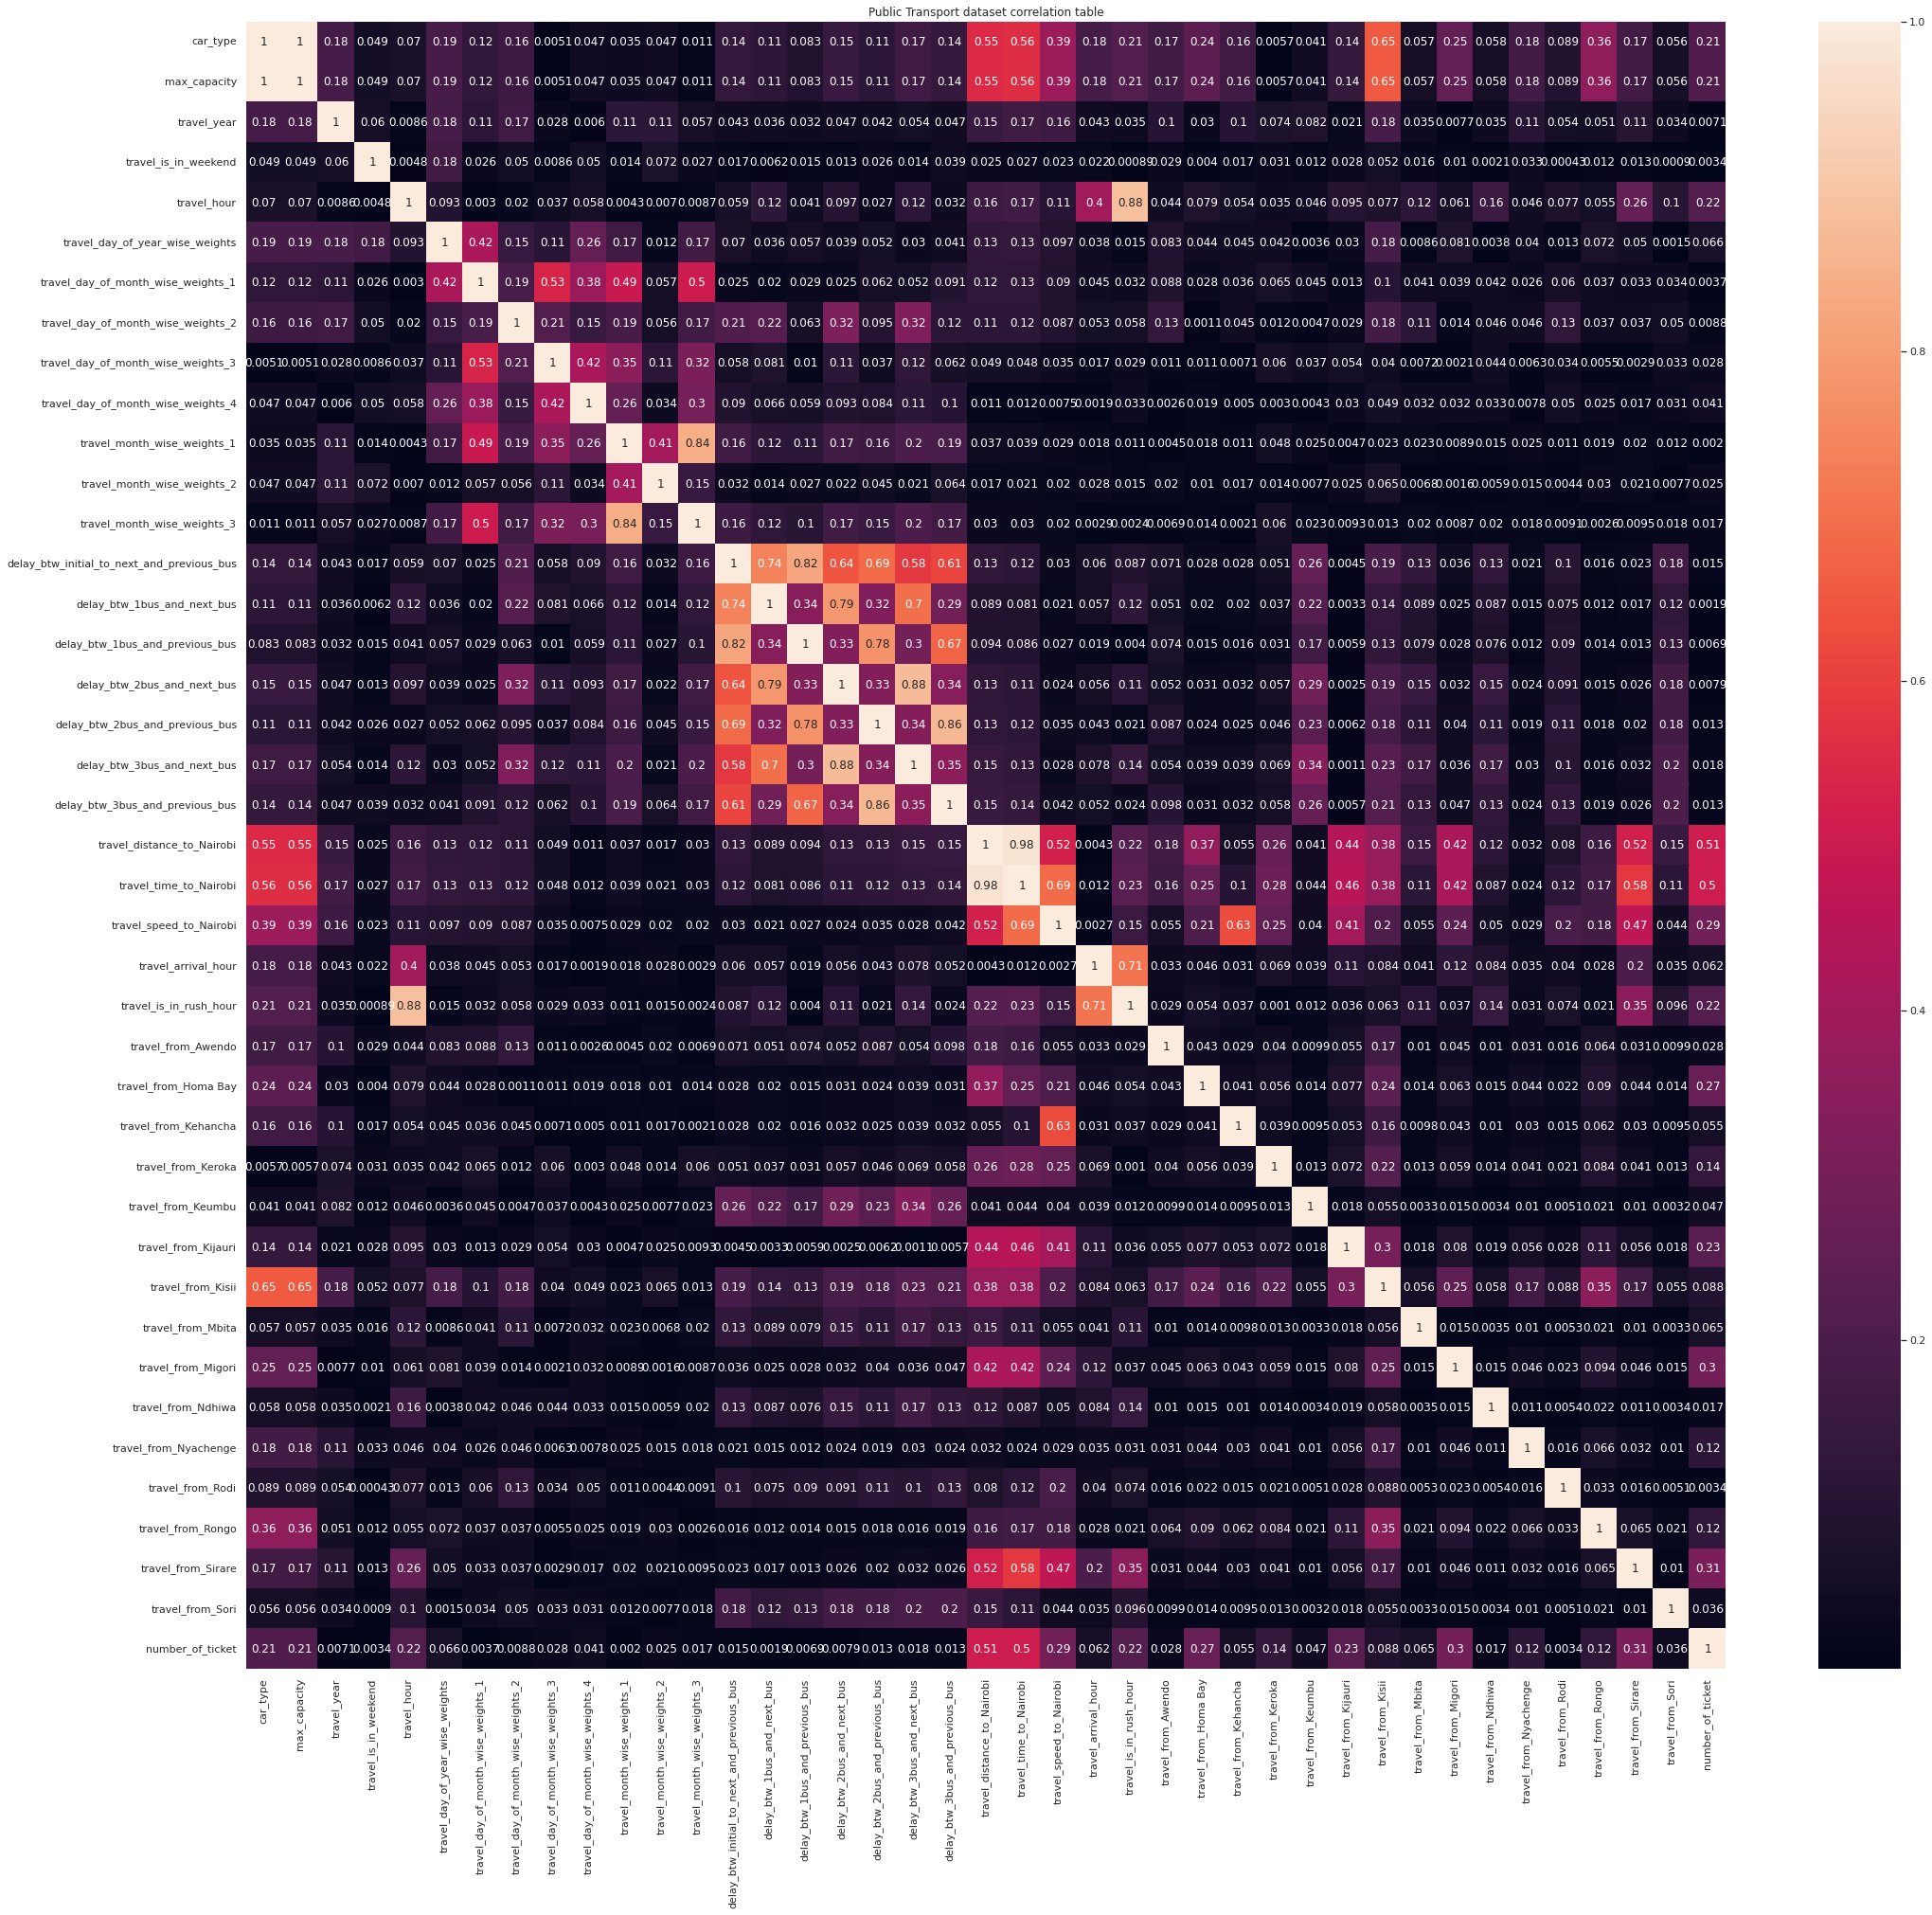

In [287]:
transport_df_corr = transport_df.corr()
fig = plt.figure(figsize=(35,32))
ax = fig.gca()
sns.heatmap(abs(transport_df_corr), annot=True, cmap='rocket')
plt.title('Public Transport dataset correlation table')

## Training models

In [288]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error,mean_absolute_percentage_error, r2_score

In [289]:
def adjusted_r2(x, r2):
  '''This function will take X variables' dataset and r^2 value as inputs and can return the adjusted r^2 as output'''
  n = len(x)
  p = len(x.columns)
  adj_r2 = 1-((1-r2)*(n-1)/(n-p-1))
  return adj_r2

In [290]:
X = transport_df.drop(['number_of_ticket'], axis= 1).copy()
y = transport_df['number_of_ticket'].copy()

print(f"Shape of X: {X.shape}")
print(f"Shape of y: {y.shape}")

Shape of X: (6246, 40)
Shape of y: (6246,)


In [291]:
# Splitting the dataset for Training and Testing models
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state= 3)

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of y_train: {y_train.shape}\n")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (4372, 40)
Shape of y_train: (4372,)

Shape of X_test: (1874, 40)
Shape of y_test: (1874,)


### Random Forest Regression

In [292]:
from sklearn.ensemble import RandomForestRegressor

In [293]:
randf_reg = RandomForestRegressor(criterion='squared_error', max_leaf_nodes=10, random_state=0)
randf_reg.fit(X_train, y_train)

RandomForestRegressor(max_leaf_nodes=10, random_state=0)

In [294]:
y_train_rf_reg = randf_reg.predict(X_train)

In [295]:
y_train_rf_reg[:10]

array([ 6.33066654,  8.4621025 , 20.03247085,  5.27552022,  8.4621025 ,
        8.4621025 ,  7.80605804,  8.4621025 ,  3.30951469, 25.46071458])

In [296]:
y_test[:10]

6076    26
3716     4
1056     1
5370     2
3268     1
5918    12
2340     4
5074     4
4263     8
3493    16
Name: number_of_ticket, dtype: int64

In [297]:
y_test_rf_reg = randf_reg.predict(X_test)

In [298]:
y_test_rf_reg[:10]

array([ 8.64267773,  8.4192362 ,  5.52374091,  5.63136565,  4.41214969,
        9.24720045,  8.4621025 ,  5.6233253 ,  8.4621025 , 19.06254379])

In [305]:
print("Train data Reg Score :",randf_reg.score(X_train,y_train))
print("Test data Reg Score :",randf_reg.score(X_test,y_test))

Train data Reg Score : 0.5501763864742097
Test data Reg Score : 0.5511027524630063


In [299]:
r2_score_train_rf_reg = r2_score(y_test, y_test_rf_reg)
print("R2 for Train data:" ,r2_score_train_rf_reg)
print("Adjusted R2 for Train data: " ,adjusted_r2(X_train, r2_score_train_rf_reg))

R2 for Train data: 0.5511027524630063
Adjusted R2 for Train data:  0.5469568531553453


In [300]:
MSE_test_rf_reg  = mean_squared_error(y_test, y_test_rf_reg)
print("MSE for Test data :" , MSE_test_rf_reg)

RMSE_test_rf_reg = np.sqrt(MSE_test_rf_reg)
print("RMSE for Test data:" ,RMSE_test_rf_reg)

MAE_test_rf_reg = mean_absolute_percentage_error(y_test, y_test_rf_reg)
print("MAE for Test data:" ,MAE_test_rf_reg)

r2_score_test_rf_reg = r2_score(y_test, y_test_rf_reg)
print("R2 for Test data:" ,r2_score_test_rf_reg)
print("Adjusted R2 for Test data: " ,adjusted_r2(X_test, r2_score_test_rf_reg))

MSE for Test data : 32.13613126216782
RMSE for Test data: 5.668873897183445
MAE for Test data: 1.428993230028101
R2 for Test data: 0.5511027524630063
Adjusted R2 for Test data:  0.5413068496253196


In [301]:
train_accuracy_rf_reg = cross_val_score(randf_reg, X_train,y_train, cv=5 )
print(f"Train_data_accuracy: {train_accuracy_rf_reg}")

Train_data_accuracy: [0.53259383 0.46938516 0.56277452 0.55498497 0.51232618]


In [302]:
test_accuracy_rf_reg = cross_val_score(randf_reg, X_test,y_test, cv=5 )
print(f"Test_data_accuracy: {test_accuracy_rf_reg}")

Test_data_accuracy: [0.51552614 0.58540898 0.43470034 0.3893009  0.5463676 ]
